In [7]:
import cv2
import skimage
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
from skimage import morphology
from skimage import segmentation

G:/LiverCancer/original/grade2/Image2-40.jpg


C:\Users\kingbook\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:19: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.


regions number: 283


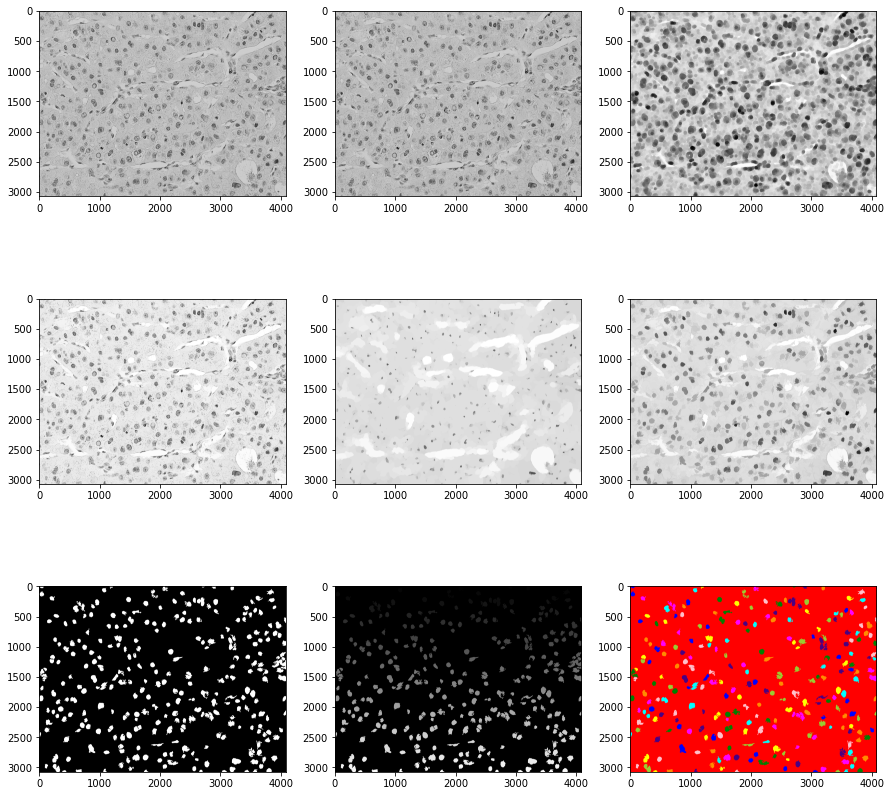

In [8]:
src_file = "G:/LiverCancer/original/grade2/Image2-40.jpg"

print(src_file)

sample_image = cv2.imread(src_file)
image_red = sample_image[:,:,2]
kernel_1 = skimage.morphology.disk(20)
kernel_2 = skimage.morphology.disk(3)

image_closing = skimage.morphology.closing(image_red, kernel_2)
image_erosion = skimage.morphology.erosion(image_closing, kernel_1)
image_reconstruction_1 = skimage.morphology.reconstruction(image_erosion,image_closing).astype(np.uint8)
image_dialtion = skimage.morphology.dilation(image_reconstruction_1, kernel_1)
image_reconstruction_2 = skimage.morphology.reconstruction(image_dialtion, image_reconstruction_1, method='erosion').astype(np.uint8)

image_zero = (image_reconstruction_2 - image_reconstruction_2.mean()).astype(np.int)
image_binary = image_zero < - 10
image_label = skimage.measure.label(image_binary)
image_label_color = skimage.color.label2rgb(image_label) 
print('regions number:',image_label.max()+1)
properties = skimage.measure.regionprops(image_label)

fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(331) 
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)
ax6 = fig.add_subplot(336)
ax7 = fig.add_subplot(337)
ax8 = fig.add_subplot(338)
ax9 = fig.add_subplot(339)

ax1.imshow(image_red, plt.cm.gray) 
ax2.imshow(image_closing, plt.cm.gray) 
ax3.imshow(image_erosion, plt.cm.gray) 
ax4.imshow(image_reconstruction_1, plt.cm.gray) 
ax5.imshow(image_dialtion, plt.cm.gray) 
ax6.imshow(image_reconstruction_2, plt.cm.gray) 
ax7.imshow(image_binary, plt.cm.gray) 
ax8.imshow(image_label, plt.cm.gray) 
ax9.imshow(image_label_color, plt.cm.gray) 
plt.show() 
